# Predicting Chance of admit

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score

#### Load the data

In [80]:
df=pd.read_csv("Admission_predict.csv")
df2=pd.read_csv("Admission_Predict_Ver1.1.csv")
dataset=pd.concat([df,df2])

In [ ]:
#dataset- https://www.kaggle.com/mohansacharya/graduate-admissions

#### Exploration

In [3]:
dataset.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [4]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,228.277778,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,134.674991,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,113.000000,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,225.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,338.000000,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [5]:
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [81]:
dataset=dataset.drop(["Serial No."],axis=1)

In [7]:
dataset.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.831137,0.650135,0.613269,0.538649,0.829021,0.570726,0.806873
TOEFL Score,0.831137,1.000000,0.669767,0.650534,0.552455,0.818476,0.476830,0.791934
University Rating,0.650135,0.669767,1.000000,0.730656,0.631142,0.723023,0.436357,0.699380
SOP,0.613269,0.650534,0.730656,1.000000,0.692200,0.714796,0.424001,0.680378
LOR,0.538649,0.552455,0.631142,0.692200,1.000000,0.651118,0.383256,0.655735
CGPA,0.829021,0.818476,0.723023,0.714796,0.651118,1.000000,0.509915,0.878284
Research,0.570726,0.476830,0.436357,0.424001,0.383256,0.509915,1.000000,0.548968
Chance of Admit,0.806873,0.791934,0.699380,0.680378,0.655735,0.878284,0.548968,1.000000


In [8]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

#### Train-Test Split

In [82]:
X=dataset.iloc[:,:-1]
y=dataset["Chance of Admit "]

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [84]:
#normalisation
u=np.mean(X_train,axis=0)
std=np.std(X_train,axis=0)
X_train=(X_train-u)/std

#### Train the data- Multivariate Linear Regression

In [59]:
m=X_train.shape[0]  #no. of training examples
n=X_train.shape[1]  #no. of features

In [85]:
X=X_train.values #obtaining a numpy array from the data frame

In [86]:
x=np.ones((m,1)) #generating bias

In [87]:
input_X=np.hstack((x,X)) #appending bias to each training example

In [100]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.01,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [110]:
theta,error_list = gradient_descent(input_X,y,0.01,500)

#### Plot the error

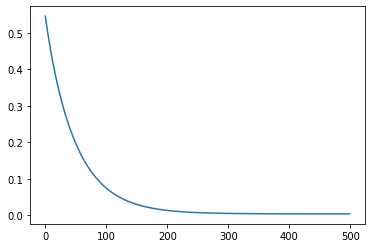

In [112]:
plt.plot(error_list)

#### Make Predictions

In [120]:
#normalisation
u=np.mean(X_test,axis=0)
std=np.std(X_test,axis=0)
X_test=(X_test-u)/std
x=np.ones((X_test.shape[0],1))
X_test=np.hstack((x,X_test))

In [121]:
preds=hypothesis(X_test,theta)

In [124]:
print(r2_score(y_test,preds)*100)

80.52399859232963
